In [1]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(gpu_options=gpu_options)
tf.keras.backend.set_session(tf.Session(config=sess_config))

In [2]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [3]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')

info['total'] = [1]*len(info)
pd.DataFrame(info.groupby(['cut', 'type']).sum().total)

total
cut   type          
fine  healthy    102
      tumor       44
thick healthy     82
      tumor      197

In [4]:
cd ..

/home/u/wartytw


In [5]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"


shape = np.load("Resection_stage1/shape.npz.npy")
resec = np.load("Resection_stage1/resec.npy")
y = np.load("Resection_stage1/resec_y.npy")
tumor_shape = np.load("Resection_stage1/shape_tumor.npy")

In [ ]:
#New begin

In [11]:
num_identity = len(resec)
contours = np.zeros((num_identity, 3, 220, 3, 100))

from scipy import ndimage


mor_type = closing.astype(np.int)
nums = [60, 70, 80]

NameError: name 'closing' is not defined

In [43]:

#summarize
from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE
#img = tumor_img[..., 50]

def set_to_100(vec):
    vs = vec.shape[0]
    if (vs < 100):
        r = 100 - vs
        tmp = np.zeros((r, vec.shape[1]))-1
        vec = np.concatenate(( vec.reshape(-1, vec.shape[1]), tmp), axis = 0)
    
    vec = vec[tuple(list(np.round(np.linspace(1, vec.shape[0] - 1, 100)).astype(int) )), :]    
    return vec
#closing

def isZero(vec):
    if (vec == []):
        return True
    return False

def cont(img):
    return max(measure.find_contours(img, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]

num = 80

#closing = cont(ndi.morphology.binary_closing(img > num, structure=struct).astype(img.dtype))


In [118]:
def set_to_pixel2(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0],mor_type[i, 1] , num_slice]
    return pixel_t

def set_to_pixel1(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0], num_slice, mor_type[i, 1] ]
    return pixel_t

def set_to_pixel0(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[ num_slice, mor_type[i, 0],mor_type[i, 1] ]
    return pixel_t


#New
def extract_cube(r, img):#cube 210, 220, 90 ;; ranges = [xmin, xmax, ymin, ymax, zmin, zmax]
    img_tmp = np.zeros((356, 289, 105))
    #print(img.shape, r)
    img_tmp[:int(r[1]-r[0]), :int(r[3]-r[2]), :int(r[5]-r[4])] = img[int(r[0]):int(r[1]), int(r[2]):int(r[3]), int(r[4]):int(r[5])]
    return img_tmp

def masking(label, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if label[i, j] == 0 or label[i, j] == 1:
                img[i, j] = 0
    return img
def masking2(label, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if label[i, j] != 1:
                img[i, j] = 0
    return img

import pandas as pd
map_df = pd.DataFrame(data={'resec_name': resec, 'shape': np.array(range(182)), 'target':y.reshape(182)})


In [119]:
# num_identity = len(resec)
# contours = np.zeros((num_identity, 3, 220, 3, 100))

# from scipy import ndimage


# mor_type = closing.astype(np.int)
# nums = [60, 70, 80]
idx = 2
name = resec[idx]
img = load_image(os.path.join(image_path, "IM_" + name + ".nii.gz"))
label = load_image(os.path.join(label_path, "LB_" + name + ".nii.gz"))
img = extract_cube(tumor_shape[idx], img)
label = extract_cube(tumor_shape[idx], label)



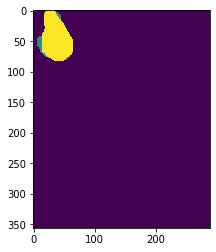

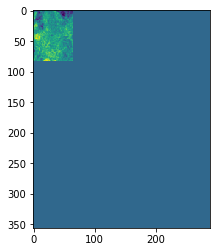

In [120]:
plt.imshow(label[..., 3])
plt.show()
plt.imshow(img[..., 3])
plt.show()

In [121]:
i = 3
label[..., i] = masking(label[..., i], label[..., i])



In [122]:
label[..., i] = ndimage.binary_dilation(label[..., i]).astype(label[..., i].dtype)

In [123]:
img[..., i] = masking2(label[..., i], img[..., i])

In [124]:
print(label[50:55, 10:20, 3])
print("===")
print(img[50:55, 10:20, 3])

[[0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]]
===
[[  0.   0.   0.  73.  74.  70.  74.  94.  93.  82.]
 [  0.   0.   0.  93.  93.  74.  67.  79. 107. 103.]
 [  0.   0.   0.  78.  75.  75.  72.  76. 104. 103.]
 [  0.   0.   0.  46.  50.  76.  64.  68.  93.  91.]
 [  0.   0.   0.  51.  82.  91.  51.  55.  93.  95.]]


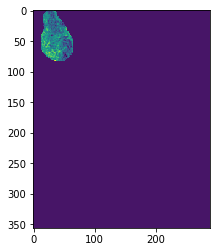

In [125]:
plt.imshow(img[..., 3])

In [126]:
num_identity = len(resec)
contours = np.zeros((num_identity, 3, 220, 3, 100))

from scipy import ndimage
from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

#mor_type = closing.astype(np.int)
nums = [60, 70, 80]

In [128]:
i = 3
for n, num in enumerate(nums):

        o1 = measure.find_contours(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img[..., i].dtype), .8)
        if(isZero(o1)):
            contours[idx, 2, i, n, :] = np.zeros((100,))
        else:
            closing = cont(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img[..., i].dtype))
            tmp_vector = set_to_pixel2(img[..., i], closing.astype(np.int), i)

IndexError: too many indices for array

In [129]:
closing = cont(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img[..., i].dtype))
closing.astype(np.int)

array([[83, 43],
       [83, 42],
       [82, 42],
       [82, 41],
       [82, 40],
       [83, 39],
       [83, 39],
       [83, 38],
       [83, 37],
       [83, 36],
       [83, 35],
       [83, 34],
       [82, 34],
       [82, 33],
       [81, 33],
       [81, 32],
       [81, 31],
       [81, 30],
       [80, 30],
       [80, 29],
       [80, 28],
       [79, 28],
       [79, 27],
       [78, 27],
       [78, 26],
       [77, 26],
       [77, 25],
       [77, 24],
       [76, 24],
       [76, 23],
       [75, 23],
       [75, 22],
       [74, 22],
       [74, 21],
       [74, 20],
       [73, 20],
       [73, 19],
       [72, 19],
       [72, 18],
       [71, 18],
       [71, 17],
       [70, 17],
       [70, 16],
       [69, 16],
       [69, 15],
       [68, 15],
       [68, 14],
       [67, 14],
       [66, 14],
       [65, 14],
       [64, 14],
       [63, 14],
       [62, 14],
       [62, 13],
       [61, 13],
       [61, 12],
       [60, 13],
       [60, 13],
       [59, 13

In [130]:
measure.find_contours(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img.dtype), .8)

[array([[19.2, 42. ],
        [19. , 41.8],
        [18. , 41.8],
        [17.2, 41. ],
        [17. , 40.8],
        [16.2, 40. ],
        [16. , 39.8],
        [15.2, 39. ],
        [15.2, 38. ],
        [15.2, 37. ],
        [16. , 36.2],
        [16.2, 36. ],
        [17. , 35.2],
        [17.2, 35. ],
        [18. , 34.2],
        [18.2, 34. ],
        [18. , 33.8],
        [17. , 33.8],
        [16.2, 33. ],
        [16. , 32.8],
        [15.2, 32. ],
        [15. , 31.8],
        [14. , 31.8],
        [13.8, 32. ],
        [13.8, 33. ],
        [13.8, 34. ],
        [13. , 34.8],
        [12.8, 35. ],
        [12. , 35.8],
        [11.8, 36. ],
        [11. , 36.8],
        [10.8, 37. ],
        [10. , 37.8],
        [ 9. , 37.8],
        [ 8. , 37.8],
        [ 7.2, 37. ],
        [ 7. , 36.8],
        [ 6.2, 36. ],
        [ 6. , 35.8],
        [ 5. , 35.8],
        [ 4. , 35.8],
        [ 3.2, 35. ],
        [ 3. , 34.8],
        [ 2.8, 35. ],
        [ 2.8, 36. ],
        [ 

In [ ]:
def set_to_pixel2(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0],mor_type[i, 1] , num_slice]
    return pixel_t

def set_to_pixel1(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0], num_slice, mor_type[i, 1] ]
    return pixel_t

def set_to_pixel0(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[ num_slice, mor_type[i, 0],mor_type[i, 1] ]
    return pixel_t



In [113]:
# for i in range(img.shape[2]):

#     num_slice = i
#     label[..., i] = ndimage.binary_dilation(label[..., i]).astype(label[..., i].dtype)
#     img[..., i] = masking(label[..., i], img[..., i])

for n, num in enumerate(nums):

    o1 = measure.find_contours(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img.dtype), .8)
    if(isZero(o1)):

        contours[idx, 2, i, n, :] = np.zeros((100,))

    else:
        closing = cont(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img[..., i].dtype))
        tmp_vector = set_to_pixel2(img, closing.astype(np.int), i)
        contours[idx, 2, i, n, :] = set_to_100(tmp_vector).reshape(100)


In [116]:
contours[idx, 2, i, 2, :]

array([ 98., 116.,  95., 104.,   0.,  50.,  76.,  76.,  93.,  63.,  73.,
        63.,  82.,  78.,  65.,  94.,   0.,  59.,  64.,  68.,  75.,  87.,
        69.,   0.,  46.,  93.,  73.,  67.,  86.,  76.,   0.,   0.,   0.,
        70.,  71.,  68.,  60.,  68.,  74.,  74.,  56.,  85.,  59.,  95.,
        87.,  86.,  58.,  81.,  76.,  62.,  76.,  75.,  62.,  61.,  41.,
        64.,  62.,  72.,  76.,  96.,  96.,  53.,  89.,  84.,  61.,  70.,
        78.,  58.,  65.,  95.,  94.,  73.,  72.,  49.,  54.,  61.,  52.,
        78.,  64.,  63.,  81.,  55.,  67.,  72.,  80.,  70.,  51.,  57.,
        82.,  66.,  83.,  82.,  55.,  72.,  62.,  94.,  96.,  87.,  94.,
        86.])

In [50]:
measure.find_contours(ndi.morphology.binary_closing(img[..., i] > 10, structure=struct).astype(img[..., i].dtype), .8)

[]

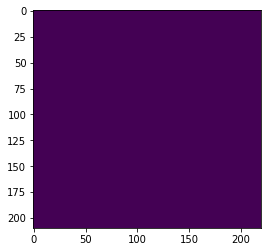

In [104]:
plt.imshow(img[..., 3])

In [ ]:
#New end

In [193]:
img = load_image(os.path.join(image_path, "IM_"+resec[1]+".nii.gz"))
label = load_image(os.path.join(label_path, "LB_"+resec[1]+".nii.gz"))

In [94]:
img.shape

(512, 512, 58)

In [21]:
position = [[], [], []]
for name in resec:
    label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
    position[0].append(np.unique(np.where(label != 0)[0]))
    position[1].append(np.unique(np.where(label != 0)[1]))
    position[2].append(np.unique(np.where(label != 0)[2]))
    
    del label

In [28]:
position2 = []
for i in range(len(position[2])):
    position2.append(position[2][i].shape[0])

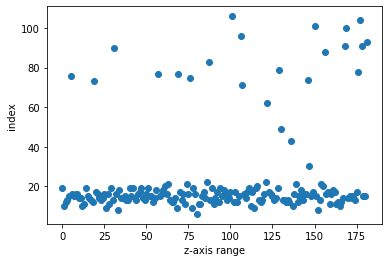

In [64]:
plt.ylabel("index")
plt.xlabel("z-axis range")
plt.scatter(list(range(len(position2))), position2)

In [61]:
resec_name_for_large = []#>50
resec_name_for_small = []#<=50

for idx, name in enumerate(resec):
    if position2[idx] > 110:
        resec_name_for_large.append(name)
    else:
        resec_name_for_small.append(name)

In [45]:
info.iloc[np.where(info.case_id == resec[0])[0][0]].resection

patient_id                     0
case_id                    PC614
exam_date            2.01408e+07
type                       tumor
cut                        thick
200_list                     NaN
diff_patient_list           True
add_date                20190618
resection                      0
stage                        IIA
size                           2
Name: 353, dtype: object

In [62]:
for name in resec_name_for_large:
    #print(name)
    #print(info.iloc[np.where(info.case_id == name)[0][0]].resection)
    if info.iloc[np.where(info.case_id == name)[0][0]].resection != 0:
        print(name)


In [68]:
# for name in resec_name_for_small:
#     #print(name)
#     #print(info.iloc[np.where(info.case_id == name)[0][0]].resection)
#     if info.iloc[np.where(info.case_id == name)[0][0]].resection == 0:
#         print(name)


In [96]:
img.shape

(512, 512, 58)

In [194]:
from scipy import ndimage
img = extract_cube(tumor_shape[1], img)
label = extract_cube(tumor_shape[1], label)
for i in range(img.shape[2]):
    label[..., i] = ndimage.binary_dilation(label[..., i]).astype(label[..., i].dtype)
    img[..., i] = masking(label[..., i], img[..., i])




In [157]:
np.unique(np.where(tumor_img != 0)[2])

array([0, 1, 2, 3, 4, 5, 6, 7])

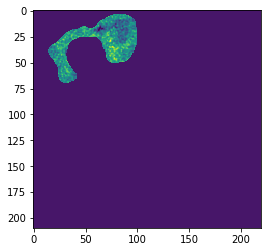

In [159]:
plt.imshow(tumor_img[..., 6])

In [121]:
img.shape

(210, 220)

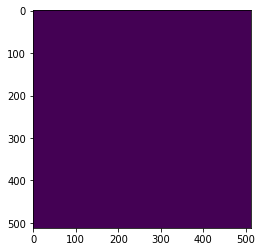

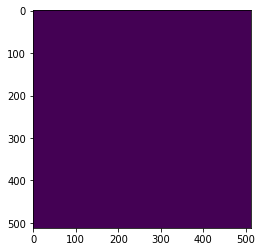

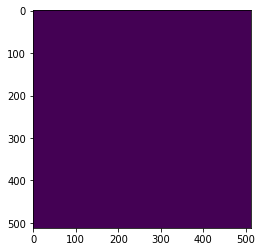

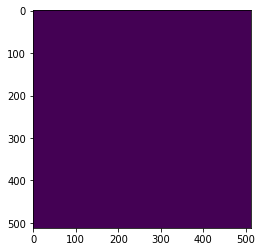

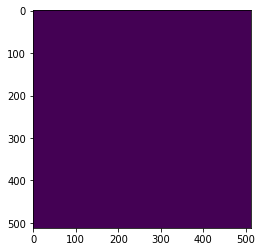

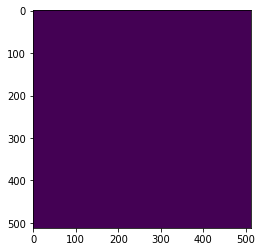

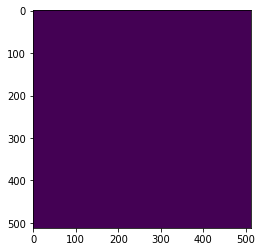

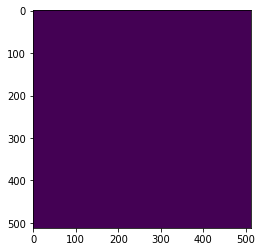

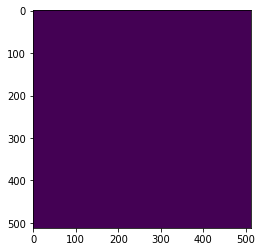

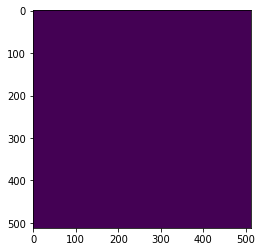

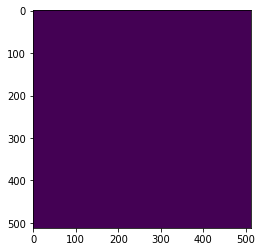

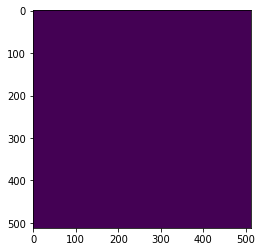

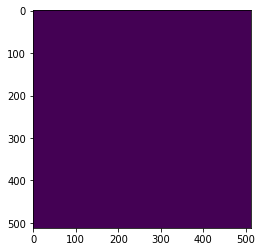

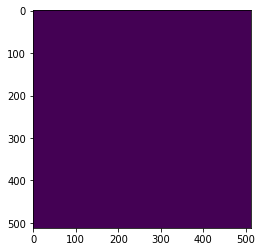

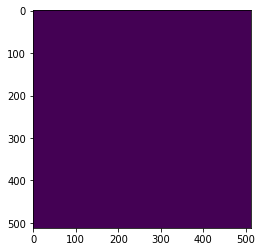

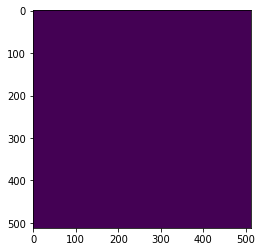

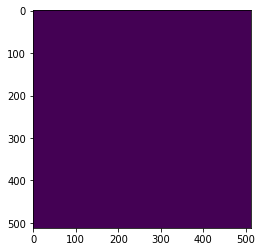

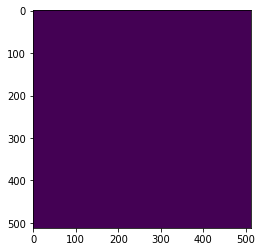

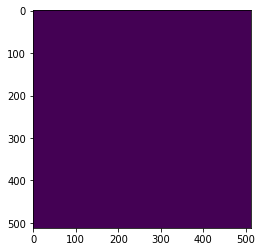

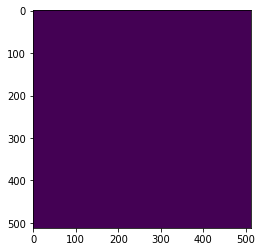

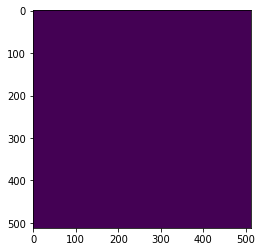

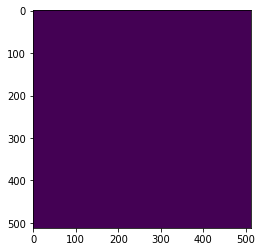

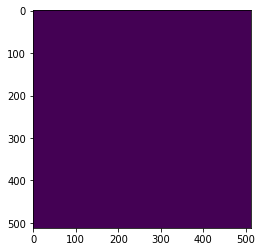

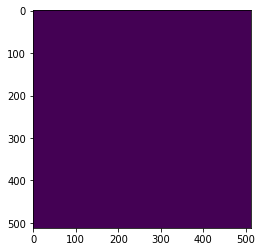

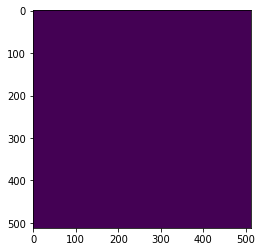

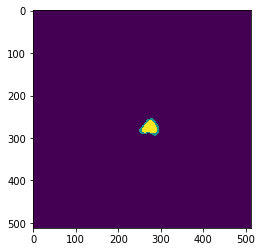

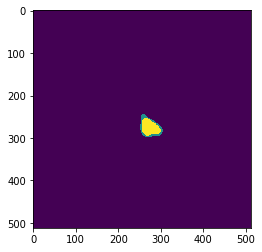

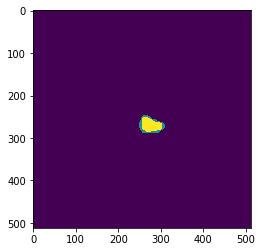

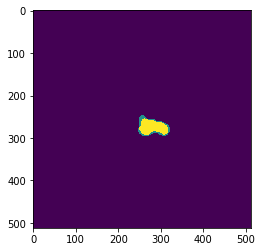

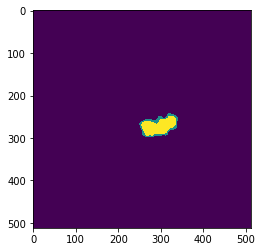

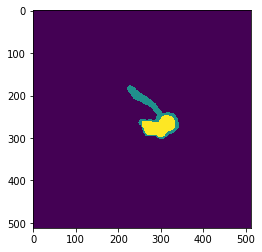

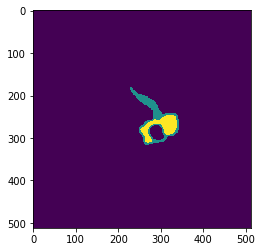

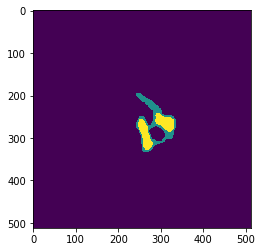

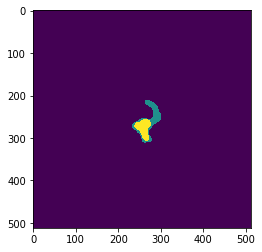

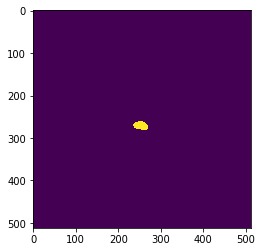

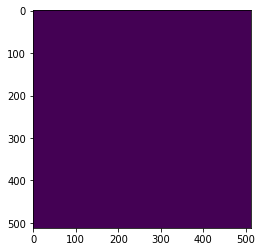

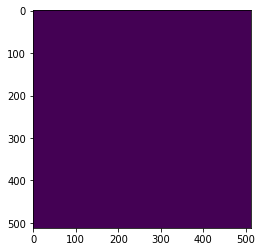

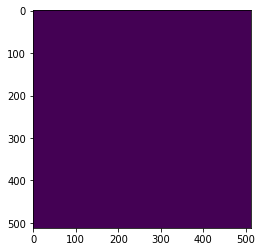

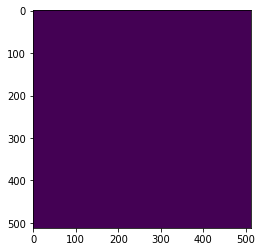

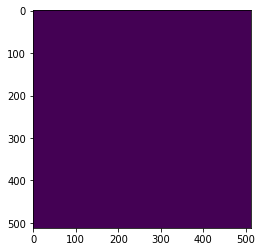

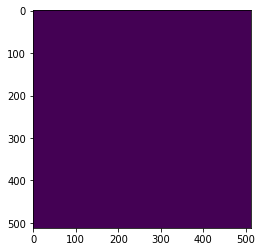

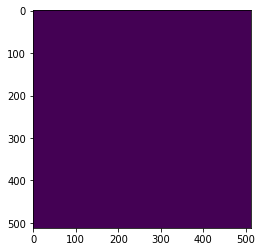

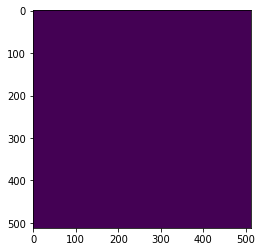

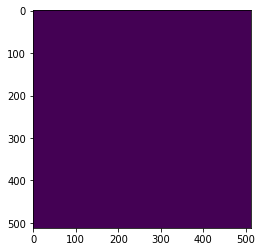

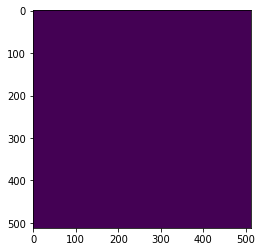

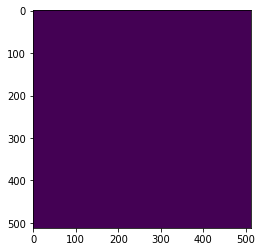

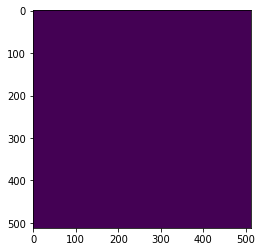

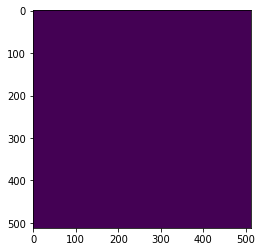

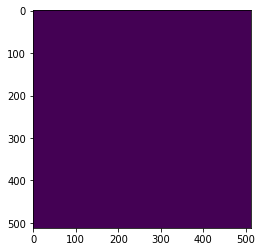

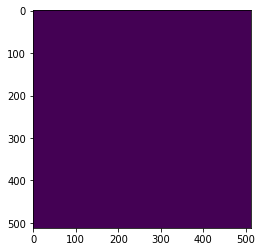

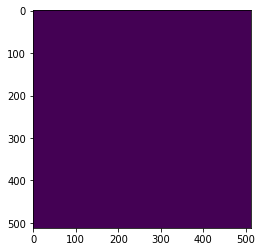

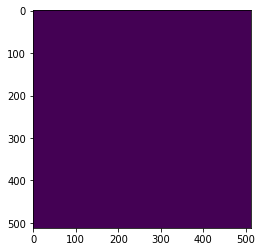

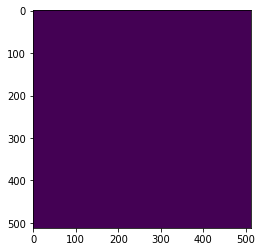

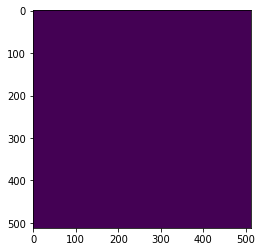

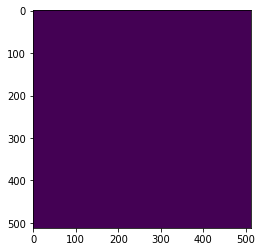

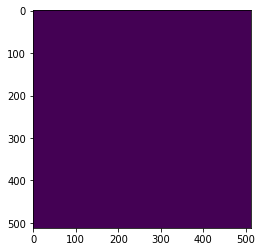

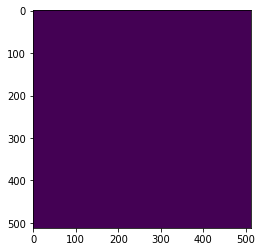

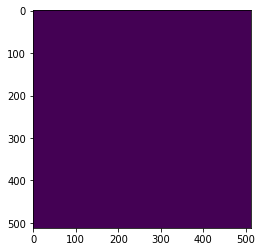

In [123]:
for i in range(img.shape[2]):
    plt.imshow(label[..., i])
    plt.show()

In [67]:
np.where(label != 0)[2]

array([72, 72, 72, ..., 58, 58, 58])

In [6]:

#summarize
from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE
img = tumor_img[..., 50]
detector = CENSURE()
detector.detect(img)
def set_to_100(vec):
    vs = vec.shape[0]
    if (vs < 100):
        r = 100 - vs
        tmp = np.zeros((r, vec.shape[1]))-1
        vec = np.concatenate(( vec.reshape(-1, vec.shape[1]), tmp), axis = 0)
    
    vec = vec[tuple(list(np.round(np.linspace(1, vec.shape[0] - 1, 100)).astype(int) )), :]    
    return vec
#closing

def isZero(vec):
    if (vec == []):
        return True
    return False

def cont(img):
    return max(measure.find_contours(img, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]


keypoint = detector.keypoints
scale = detector.scales
num = 80
#erosion = cont(ndi.morphology.binary_erosion(img > num, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img > num, structure=struct).astype(img.dtype))
#opening = cont(ndi.morphology.binary_opening(img > num, structure=struct).astype(img.dtype))
#dilation = cont(ndi.morphology.binary_dilation(img > num, structure=struct).astype(img.dtype))

# plt.title("The sixth image in the cropped tile with dilation, image > 80")
# plt.imshow(tumor_img[..., 6].T, alpha=.2)
# #plt.plot(erosion[::,0], erosion[::,1], c='b')
# #plt.plot(opening[::,0], opening[::,1], c='g')
# plt.plot(closing[::,0], closing[::,1], c='r')
# plt.plot(dilation[::,0], dilation[::,1], c='k')

NameError: name 'tumor_img' is not defined

In [197]:
o1 = measure.find_contours(ndi.morphology.binary_closing(img > num, structure=struct).astype(img.dtype), .8)

In [209]:
def set_to_pixel2(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0],mor_type[i, 1] , num_slice]
    return pixel_t

def set_to_pixel1(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[mor_type[i, 0], num_slice, mor_type[i, 1] ]
    return pixel_t

def set_to_pixel0(tumor_img, mor_type, num_slice):
    pixel_t = np.zeros((mor_type.shape[0], 1))
    for i in range(mor_type.shape[0]):
        pixel_t[i] = tumor_img[ num_slice, mor_type[i, 0],mor_type[i, 1] ]
    return pixel_t



# mor_type = closing.astype(np.int)
# num_slice = 6
# pixel_t = np.zeros((mor_type.shape[0], 1))




# for i in range(mor_type.shape[0]):
#     pixel_t[i] = tumor_img[mor_type[i, 0],mor_type[i, 1] , num_slice]
# print(pixel_t)

In [203]:
set_to_100(tumor_img[closing.astype(np.int)[i, 0],closing.astype(np.int)[i, 1] ])

IndexError: tuple index out of range

In [206]:
img = load_image(os.path.join(image_path, "IM_" + resec[2] + ".nii.gz"))
label = load_image(os.path.join(label_path, "LB_" + resec[2] + ".nii.gz"))
img = extract_cube(tumor_shape[idx], img)
label = extract_cube(tumor_shape[idx], label)

for i in range(img.shape[2]):
    num_slice = i
    label[..., i] = ndimage.binary_dilation(label[..., i]).astype(label[..., i].dtype)
    img[..., i] = masking(label[..., i], img[..., i])
    
    for n, num in enumerate(nums):

        o1 = measure.find_contours(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img.dtype), .8)
        if(isZero(o1)):
            closing  = np.zeros((100, 2))
            tmp_vector = set_to_pixel(img, closing.astype(np.int), i)
            contours[idx, 2, i, n, :] = set_to_100(tmp_vector).reshape(100)
        else:
            closing = cont(ndi.morphology.binary_closing(img > num, structure=struct).astype(img.dtype))
            tmp_vector = set_to_pixel(img, closing.astype(np.int), i)
            contours[idx, 2, i, n, :] = set_to_100(tmp_vector).reshape(100)

In [70]:
#New
def extract_cube(r, img):#cube 210, 220, 90 ;; ranges = [xmin, xmax, ymin, ymax, zmin, zmax]
    img_tmp = np.zeros((210, 220, 90))
    #print(img.shape, r)
    img_tmp[:int(r[1]-r[0]), :int(r[3]-r[2]), :int(r[5]-r[4])] = img[int(r[0]):int(r[1]), int(r[2]):int(r[3]), int(r[4]):int(r[5])]
    return img_tmp


def masking(label, img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if label[i, j] == 0 or label[i, j] == 1:
                img[i, j] = 0
    return img

import pandas as pd
map_df = pd.DataFrame(data={'resec_name': resec, 'shape': np.array(range(182)), 'target':y.reshape(182)})


In [223]:
resec[0]

'PC614'

In [224]:
#create 3 contours in 3 dimensions
#182 identities in total 
#1. crop into (210, 220, 90) -> dilation ->masking
#2. erosion for each 60, 70, 80
#3. store in contours[182, 3, n_{dimension} , 3, 100] #identity, dimension, num_slcie,  contour  ;; num_slice = [210, 200, 90]
num_identity = len(resec)
contours = np.zeros((num_identity, 3, 220, 3, 100))

from scipy import ndimage


mor_type = closing.astype(np.int)
nums = [60, 70, 80]
for idx, name in enumerate(resec[:1]):
    img = load_image(os.path.join(image_path, "IM_" + name + ".nii.gz"))
    label = load_image(os.path.join(label_path, "LB_" + name + ".nii.gz"))
    img = extract_cube(tumor_shape[idx], img)
    label = extract_cube(tumor_shape[idx], label)
    
    for i in range(img.shape[2]):
        
        num_slice = i
        label[..., i] = ndimage.binary_dilation(label[..., i]).astype(label[..., i].dtype)
        img[..., i] = masking(label[..., i], img[..., i])
        
        for n, num in enumerate(nums):
            
            o1 = measure.find_contours(ndi.morphology.binary_closing(img[..., i] > num, structure=struct).astype(img.dtype), .8)
            if(isZero(o1)):
                
                contours[idx, 2, i, n, :] = np.zeros((100,))
                
            else:
#                 closing = cont(ndi.morphology.binary_closing(img > num, structure=struct).astype(img.dtype))
#                 tmp_vector = set_to_pixel2(img, closing.astype(np.int), i)
                contours[idx, 2, i, n, :] = np.zeros((100,))
    
    for i in range(img.shape[1]):
        num_slice = i
        label[:, i, :] = ndimage.binary_dilation(label[:, i, :]).astype(label[:, i, :].dtype)
        img[:, i, :] = masking(label[:, i, :], img[:, i, :])
       
        for n, num in enumerate(nums):
            o1 = measure.find_contours(ndi.morphology.binary_closing(img[:, i, :] > num, structure=struct).astype(img.dtype), .8)
            if(isZero(o1)):
                closing  = np.zeros((100, 2))
                tmp_vector = set_to_pixel1(img, closing.astype(np.int), i)
                contours[idx, 1, i, n, :] = set_to_100(tmp_vector).reshape(100)
            else:
#                 closing = cont(ndi.morphology.binary_closing(img[:, i,: ] > num, structure=struct).astype(img.dtype))
#                 tmp_vector = set_to_pixel1(img, closing.astype(np.int), i)
                contours[idx, 1, i, n, :] = np.zeros((100,))
            
    
    for i in range(img.shape[0]):
        num_slice = i
        label[i, :, :] = ndimage.binary_dilation(label[i, :, :]).astype(label[i, :, :].dtype)
        img[i, :, :] = masking(label[i, :, :], img[i, :, :])
        
        for n, num in enumerate(nums):
            o1 = measure.find_contours(ndi.morphology.binary_closing(img[i, :, :] > num, structure=struct).astype(img.dtype), .8)
            if(isZero(o1)):
                closing  = np.zeros((100, 2))
                tmp_vector = set_to_pixel0(img, closing.astype(np.int), i)
                contours[idx, 0, i, n, :] = set_to_100(tmp_vector).reshape(100)
            else:
                closing  = cont(ndi.morphology.binary_closing(img[i, :, :] > num, structure=struct).astype(img.dtype))
                tmp_vector = set_to_pixel0(img, closing.astype(np.int), i)
                contours[idx, 0, i, n, :] = set_to_100(tmp_vector).reshape(100)
                
        
    del img, label

   




In [225]:
#check the contours
np.where(contours != 0)

(array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64))

In [13]:
diff0 = tumor_shape[:, 1] - tumor_shape[:, 0]

In [16]:
diff0.astype(np.int)

array([ 28,  86,  84,  32,  33,  92,  11,  82,  40,  78,  91,  31,  23,
       116,  37,  29,  50,  81, 111,  38,  46,  49,  32,  51,  13,  20,
        19, 147,  52,  44,  31, 153,  18,  48,  36,  12,  29, 200,  62,
        84,  59,  65,  40,  31,  39,  40,  13,  38,  36,  47,  25,  35,
        74,  82,  78,  54,  19,  46,  81,  32,  72,  40,  38,  16,  32,
        71,  46,  59,  79, 207,  46, 166,  31,   8, 167,  38,  56,  52,
        80,  33,  58,  50,  11,  80,  27,  26,  20,  92,  76,  66,  18,
        22,  44,  73,  81, 102,  46,  36,  39,  80,  49,  14,  61,  42,
        59,  66,  36,  88,  57,  79,  38,  49,  33,  48,  70,  94,  36,
        36,  27,  75,  45,  67,  70,  77,  57,  36,  39,  28,  39,  14,
        36,  32,  50,  32,  20,  50,  79,  25,  75, 170,  47,  75,  32,
        49,  61,  66,  45, 181,  40,  40,  32,  57,  29,  50,  89,  60,
       115,  13,  59,  28,  86, 100,  20,  49,  32,  26,  19,  39,  40,
        73,  42,  72,  67,  66,  24,  49,  91, 114, 102,  65,  1

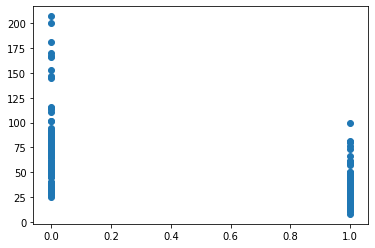

In [19]:
plt.scatter(y, diff0)